In [93]:
import pandas as pd
from pathlib import Path
from fwhm.star_finder import StarFinder
from fwhm.star_matcher import StarMatcher, register_stars
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict
import math

In [94]:
# root_dir = Path(r"D:\Astro\auto-focus-samples\m1")
root_dir = Path(r"D:\Astro\auto-focus-samples\set2")
files = list(root_dir.glob("*.fit"))
image_files = [(str(f), re.match(r'.*?Light_(\d+)_.*', f.stem).group(1), re.match(r'.*?_focus(\d+)', f.stem).group(1)) for f in files]
image_files = sorted(image_files, key=lambda x: int(x[1]))

In [95]:
registered_stars = register_stars([x[0] for x in image_files])

c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)


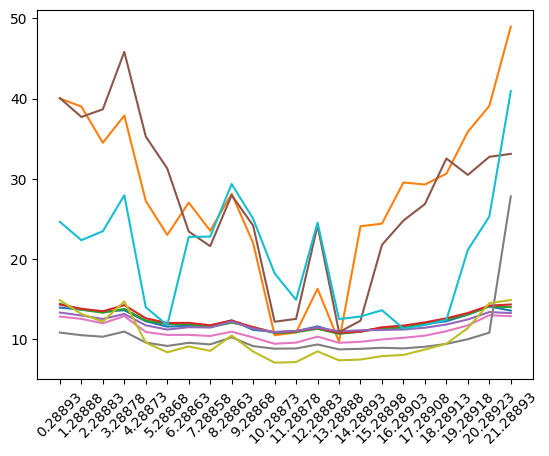

In [96]:
focus_pts = [f"{i}.{x[2]}" for i,x in enumerate(image_files)]
for slist in registered_stars:
  plt.plot(focus_pts, [math.sqrt(s.fwhm_x**2 + s.fwhm_y**2) for s in slist])
plt.xticks(rotation=45)
plt.show()

In [101]:
avgs = defaultdict(list)
for i, (fname, fno, focusnum) in enumerate(image_files):
  total = 0
  for s in registered_stars:
    total += math.sqrt(s[i].fwhm_x**2 + s[i].fwhm_y**2)
  avgs[int(focusnum)].append(total / len(registered_stars[0]) )
avgs = sorted([(k,np.mean(v)) for k,v in avgs.items()], key=lambda x:x[0])

In [102]:
x = [x[0] for x in avgs]
y = [x[1] for x in avgs]
coeffs = np.polyfit(x, y, 2)
yp = np.polyval(coeffs, x)

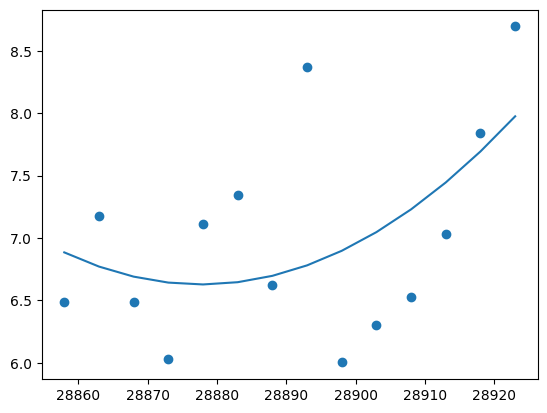

In [103]:
plt.scatter(x, y)
plt.plot(x, yp)

In [104]:
-coeffs[1]/(2*coeffs[0])

28877.75943761226